<a href="https://colab.research.google.com/github/aanchan1/house-price-prediction/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt

# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (9,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 12

In [2]:
# import the data
house_data = pd.read_csv("train-chennai-sale.csv")
house_data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
# Shape of data
house_data.shape

(7109, 22)

In [4]:

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [5]:
# Describe the numeric columns
house_data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
# data cleaning
# Find categorical columns
cat_columns = house_data.select_dtypes('object')
cat_columns.head(10)


,PRT_ID,AREA,DATE_SALE,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE
0,P03210,Karapakkam,04-05-2011,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A
1,P09411,Anna Nagar,19-12-2006,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH
2,P01812,Adyar,04-02-2012,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL
3,P05346,Velachery,13-03-2010,Family,No,18-03-1988,Others,NoSewr,Paved,I
4,P06210,Karapakkam,05-10-2009,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C
5,P00219,Chrompet,11-09-2014,Partial,No,12-09-2009,Commercial,NoSeWa,No Access,RH
6,P09105,Chrompet,05-04-2007,Partial,No,12-04-1979,Other,AllPub,No Access,RL
7,P09679,Velachery,13-03-2006,Family,No,15-03-1996,Commercial,AllPub,Gravel,RM
8,P03377,Chrompet,06-04-2011,AdjLand,No,14-04-1977,Others,NoSewr,Paved,RM
9,P09623,Velachery,22-06-2006,AbNormal,No,26-06-1991,Others,ELO,No Access,I


In [7]:
# Numeric columns 
numeric_cols = house_data.select_dtypes(exclude=['object'])
numeric_cols.head(10)

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,1004,131,1.0,1.0,3,4.0,3.9,4.9,4.330,380000,144400,7600000
1,1986,26,2.0,1.0,5,4.9,4.2,2.5,3.765,760122,304049,21717770
2,909,70,1.0,1.0,3,4.1,3.8,2.2,3.090,421094,92114,13159200
3,1855,14,3.0,2.0,5,4.7,3.9,3.6,4.010,356321,77042,9630290
4,1226,84,1.0,1.0,3,3.0,2.5,4.1,3.290,237000,74063,7406250
5,1220,36,2.0,1.0,4,4.5,2.6,3.1,3.320,409027,198316,12394750
6,1167,137,1.0,1.0,3,3.6,2.1,2.5,2.670,263152,33955,8488790
7,1847,176,3.0,2.0,5,2.4,4.5,2.1,3.260,604809,235204,16800250
8,771,175,1.0,1.0,2,2.9,3.7,4.0,3.550,257578,33236,8308970
9,1635,74,2.0,1.0,4,3.1,3.1,3.3,3.160,323346,121255,8083650


In [8]:
cat_columns.AREA.value_counts()


Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: AREA, dtype: int64

In [9]:
# Correct misspelled area names
misspelled_area_names = {
    'Chrompt':'Chrompet', 
    'Chrmpet':'Chrompet', 
    'Chormpet':'Chrompet',
    'Karapakam':'Karapakkam',
    'TNagar':'T Nagar',
    'Ana Nagar': 'Anna Nagar',
    'Adyr': 'Adyar',
    'Ann Nagar': 'Anna Nagar',
    'Velchery': 'Velachery',
    'KKNagar':'KK Nagar'
}

# Replace misspelled area names
house_data['AREA'] = house_data.AREA.replace(misspelled_area_names)
house_data.AREA.value_counts() # Check the replaced values

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: AREA, dtype: int64

In [10]:
# misspelled names in sale_cond
cat_columns.SALE_COND.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: SALE_COND, dtype: int64

In [11]:
# Replace misspelled names in sale_cond in original data.
house_data['SALE_COND'] = house_data.SALE_COND.replace({'Adj Land':'AdjLand', 'Ab Normal':'AbNormal', 'Partiall':'Partial','PartiaLl':'Partial'})

house_data.SALE_COND.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64

In [12]:
# Misspelled words in park_facil columns
cat_columns.PARK_FACIL.value_counts()

Yes    3587
No     3520
Noo       2
Name: PARK_FACIL, dtype: int64

In [13]:
# Replace misspelled words
house_data['PARK_FACIL'] = house_data.PARK_FACIL.replace({'Noo':'No'})

# confirming the correctness
house_data.PARK_FACIL.value_counts()

Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64

In [14]:
# Misspelled words in 'buildtype'
cat_columns.BUILDTYPE.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: BUILDTYPE, dtype: int64

In [15]:
# Replace misspelled words
house_data['BUILDTYPE'] = house_data.BUILDTYPE.replace({'Other':'Others', 'Comercial':'Commercial'})

# Check
house_data.BUILDTYPE.value_counts()


House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64

In [16]:
# Misspelled words in utility_avail column
cat_columns.UTILITY_AVAIL.value_counts()


AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: UTILITY_AVAIL, dtype: int64

In [17]:
# Replacing misspelled words in utility_avail
house_data['UTILITY_AVAIL'] = house_data['UTILITY_AVAIL'].replace({'All Pub':'AllPub'})

# check 
house_data.UTILITY_AVAIL.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64

In [18]:
# Check misspelled words in street columns
cat_columns.STREET.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: STREET, dtype: int64

In [19]:
# Replace misspelled words
house_data['STREET'] = house_data.STREET.replace({'NoAccess':'No Access', 'Pavd':'Paved'})

# Check
house_data.STREET.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: STREET, dtype: int64

In [20]:
cat_columns.MZZONE.value_counts()


RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: MZZONE, dtype: int64

In [21]:
# convert date time objects to date time type
house_data['DATE_SALE'] = pd.to_datetime(house_data.DATE_SALE)
house_data['DATE_BUILD'] = pd.to_datetime(house_data.DATE_BUILD)

In [22]:
# check for duplicated rows
house_data.duplicated().any()


False

In [23]:
# check for missing values
house_data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [24]:
print(numeric_cols.QS_OVERALL.mean())

print(numeric_cols.QS_OVERALL.mode())

print(numeric_cols.QS_OVERALL.isna().sum())
#There are 48 rows with missing values in qs_oveall column.
#The mean, median and mode of the column is same .
#Replacing the missing values with 3.5 will work.
# Replace missing values with 3.5
house_data['QS_OVERALL'] = house_data['QS_OVERALL'].replace(np.nan, house_data.QS_OVERALL.mean())

house_data.QS_OVERALL.isna().sum()

3.5032537884152344
0    3.54
dtype: float64
48


0

In [25]:
# filling the missing values for bathroom
print(numeric_cols.N_BATHROOM.value_counts())

print(numeric_cols.N_BATHROOM.median())

print(numeric_cols.N_BATHROOM.mode())

print(numeric_cols.N_BATHROOM.isna().sum())

#The column n_bathroom is a categorical column though it looks like numeric.
#It'll be good to replace with mode value.
numeric_cols.N_BATHROOM.mode().values[0]

house_data['N_BATHROOM'] = house_data['N_BATHROOM'].replace(np.nan, house_data.N_BATHROOM.mode().values[0])
house_data['N_BATHROOM'].isna().sum()

1.0    5589
2.0    1515
Name: N_BATHROOM, dtype: int64
1.0
0    1.0
dtype: float64
5


0

In [26]:
# Missing values in n_bedroom column
print(numeric_cols.N_BEDROOM.value_counts())
print(numeric_cols.N_BEDROOM.mode())

print(numeric_cols.N_BEDROOM.isna().sum())

# In the n_bedroom column there's only one row with missing value.
# Replacing it with mode won't make any difference.
house_data['N_BEDROOM'] = house_data['N_BEDROOM'].replace(np.nan, house_data.N_BEDROOM.mode().values[0])
house_data['N_BEDROOM'].isna().sum()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: N_BEDROOM, dtype: int64
0    1.0
dtype: float64
1


0

In [27]:
#Change necessary numeric columns to categorical column
numeric_cols.N_ROOM.value_counts()
# Change categorical columns values to integer
house_data['N_BEDROOM'] = house_data.N_BEDROOM.apply(int)
house_data['N_BATHROOM'] = house_data.N_BATHROOM.apply(int)
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [28]:
#Drop columns
# The reg_fee and commis columns are not useful attributes.
# But, its necessary to pay those fees for a house.
# Let's add these fees to the sales_price and drop those columns.
# But, there rises a question, adding these values to the sales_price is good choice?
# These values are may not be directly relatable to each other, but depending on the are, municipality zone, public services, and nearest to high way or other needs, these value of registration fee and commission fee are indirectly related to the house price.
numeric_cols.iloc[:,9:][:5]
# Add commission price and registration price to Sales price
house_data['SALES_PRICE'] = house_data.SALES_PRICE + house_data.REG_FEE + house_data.COMMIS 
# Change column names to avoid confusion

house_data.rename(columns={'area':'locality', 'int_sqft':'house_size'}, inplace=True)
# Find age of house
# From the date_build we can derive age of the house.
# We will calculate age from building date to today's date


# age of house
house_data['AGE'] = pd.DatetimeIndex(house_data['DATE_SALE']).year - pd.DatetimeIndex(house_data['DATE_BUILD']).year
# Now, drop unnecessary columns
data = house_data.drop(['PRT_ID','REG_FEE','COMMIS','DATE_SALE', 'DATE_BUILD'], axis=1)
data.head()


,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,Karapakkam,1004,131,1,1,3,AbNormal,Yes,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,8124400,44
1,Anna Nagar,1986,26,2,1,5,AbNormal,No,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,22781941,11
2,Adyar,909,70,1,1,3,AbNormal,Yes,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,13672408,20
3,Velachery,1855,14,3,2,5,Family,No,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,10063653,22
4,Karapakkam,1226,84,1,1,3,AbNormal,Yes,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,7717313,30


In [29]:
# unique values in area 

print(data.AREA.unique())

# value counts
area_df = house_data.AREA.value_counts().reset_index(name='count')#.rename_axis('total')

area_df

['Karapakkam' 'Anna Nagar' 'Adyar' 'Velachery' 'Chrompet' 'KK Nagar'
 'T Nagar']


,index,count
0,Chrompet,1702
1,Karapakkam,1366
2,KK Nagar,997
3,Velachery,981
4,Anna Nagar,788
5,Adyar,774
6,T Nagar,501


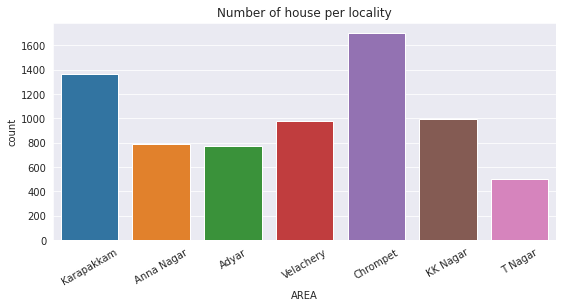

In [30]:
plt.figure(figsize=(9,4))
sns.countplot(x='AREA', data=data)
plt.title("Number of house per locality")
plt.xticks(rotation=30)
plt.show()
# Chrompet has highest number of houses followed by Karapakkam,
# T Nagar has least number of houses.

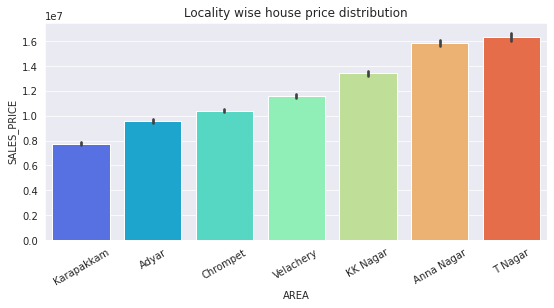

In [31]:
order = data[['AREA','SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index()
plt.figure(figsize=(9,4))
sns.barplot(x='AREA', y='SALES_PRICE',data= data, palette='rainbow', order= data[['AREA','SALES_PRICE']].groupby('AREA').mean().sort_values('SALES_PRICE').reset_index().AREA)
plt.xticks(rotation=30)
plt.title("Locality wise house price distribution")
plt.show()
# Locality wise house price follows a linear relationship.
# Karapakkam has cheapest houses and T Nagar has expensive houses.
# ** Use label encoding

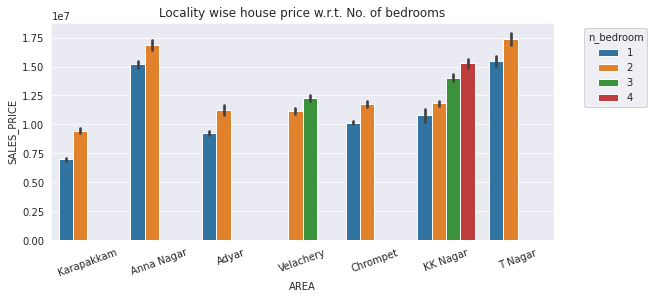

In [32]:
plt.figure(figsize=(9,4))
sns.barplot(x='AREA',y='SALES_PRICE', data=data, hue='N_BEDROOM')
plt.title("Locality wise house price w.r.t. No. of bedrooms")
plt.xticks(rotation=20)
plt.legend(title='n_bedroom',bbox_to_anchor=(1.05,1))
plt.show()
# Most of areas have single bedroom houses.
# Karapakkam is the only area to have houses with 4 bedrooms.
# Valachery has no single bedroom house.

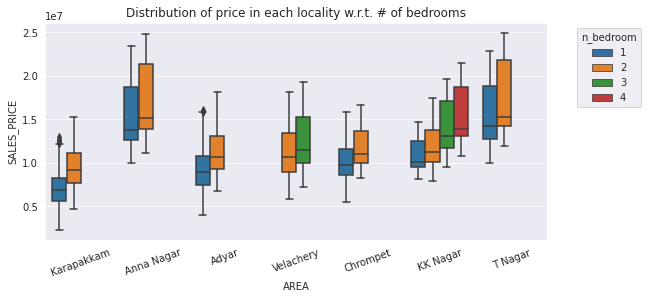

In [33]:
plt.figure(figsize=(9,4))
sns.boxplot(x='AREA',y='SALES_PRICE', data=data, hue='N_BEDROOM')
plt.xticks(rotation=20)
plt.title("Distribution of price in each locality w.r.t. # of bedrooms")
plt.legend(title="n_bedroom", bbox_to_anchor=(1.05,1))
plt.show()
# Anna Nagar and T Nagar has highest price houses.
# KK Nagar has 4 bedroom houses but their price is comparatively lower to 2 bedroom houses in Anna Nagar and T-Nagar.

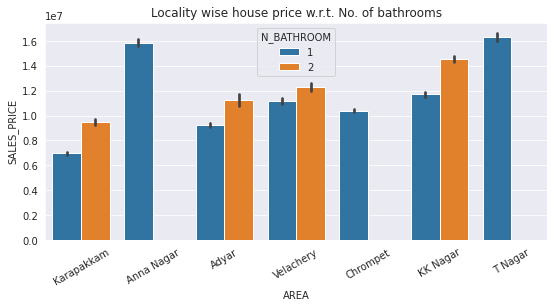

In [34]:
plt.figure(figsize=(9,4))
sns.barplot(x='AREA',y='SALES_PRICE', data=data, hue='N_BATHROOM')
plt.title("Locality wise house price w.r.t. No. of bathrooms")
plt.xticks(rotation=30)
plt.show()


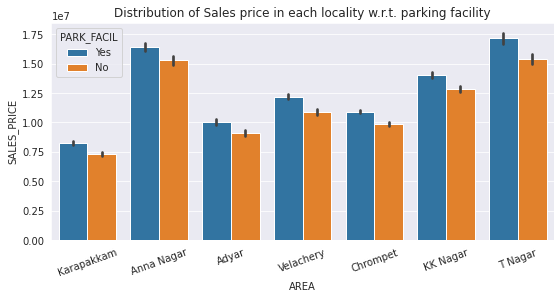

In [35]:
plt.figure(figsize=(9,4))
sns.barplot(x='AREA', y='SALES_PRICE', data=data, hue='PARK_FACIL')
plt.xticks(rotation=20)
plt.title("Distribution of Sales price in each locality w.r.t. parking facility")
plt.show()
#All the areas have parking facility houses, in fact, parking facility houses are more in number in comparison to houses with no parking facility.


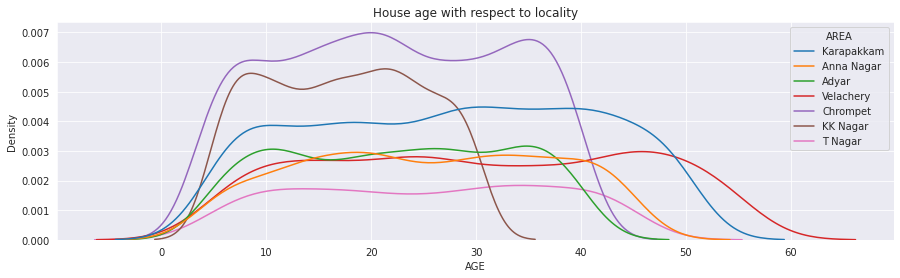

In [36]:
plt.figure(figsize=(15,4))
sns.kdeplot('AGE', hue='AREA', data=data)
plt.title("House age with respect to locality")
plt.show()

# Velachery has more old houses.

# KK Nagar has more young houses.



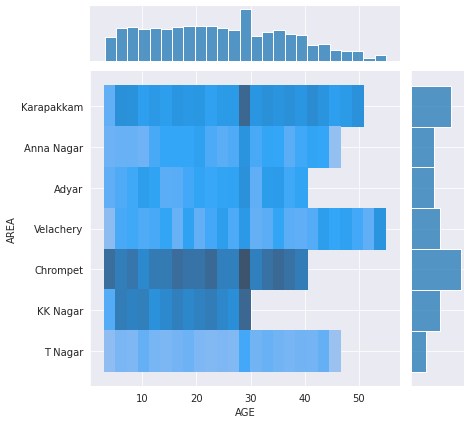

In [37]:
sns.jointplot(x='AGE', y='AREA', data=data, kind='hist');
# KK Nagar has houses under 30 years old, Velachery has more older houses more than 50 years old.

# The dataset has less number of houses with age more than 40. More number of houses are of 30 years old.

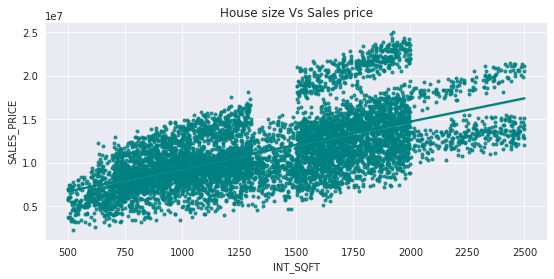

In [38]:
plt.figure(figsize=(9,4))
sns.regplot(x='INT_SQFT', y='SALES_PRICE', data=data, marker='.', color='teal')
plt.title("House size Vs Sales price")
plt.show()

#House size has linear relationship with Sales price.


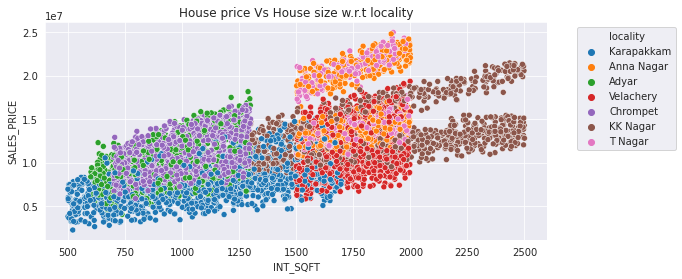

In [39]:
plt.figure(figsize=(9,4))
sns.scatterplot(data=data, x='INT_SQFT', y='SALES_PRICE', hue='AREA')
plt.title("House price Vs House size w.r.t locality")
plt.legend(title='locality',bbox_to_anchor=(1.05, 1))
plt.show()
# House size follows linear relationship with house price.
# KK Nagar houses are comparatively bigger in size than houses in other areas.
# Karapakkam, Adyar has lower size houses.

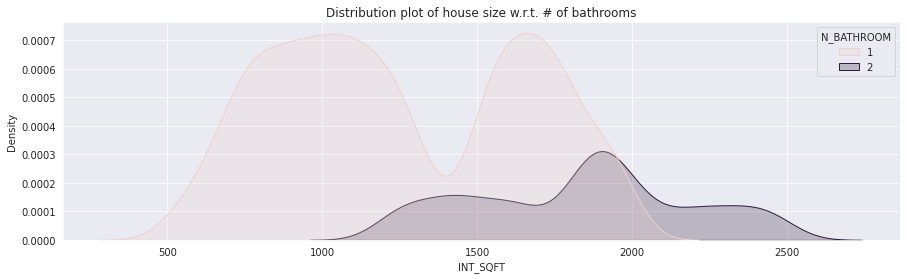

In [40]:
plt.figure(figsize=(15,4))
sns.kdeplot('INT_SQFT', hue='N_BATHROOM', data=data, shade=True)
plt.title("Distribution plot of house size w.r.t. # of bathrooms")
plt.show()

# Houses with single bathroom belongs to an size of 500 to 2000 sq ft.
# Whereas, the houses with dual bathroom are bigger in size ranging from 1000 sq ft to 2500+ sq ft.

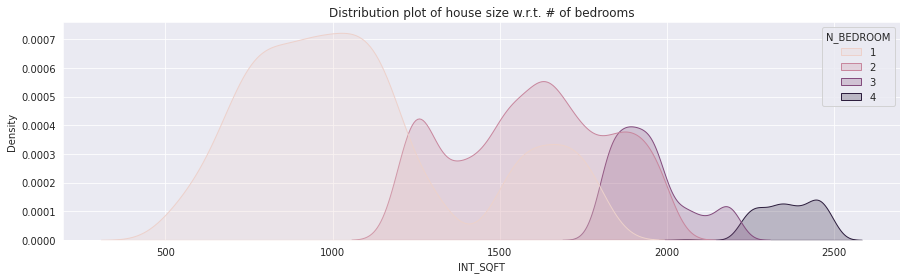

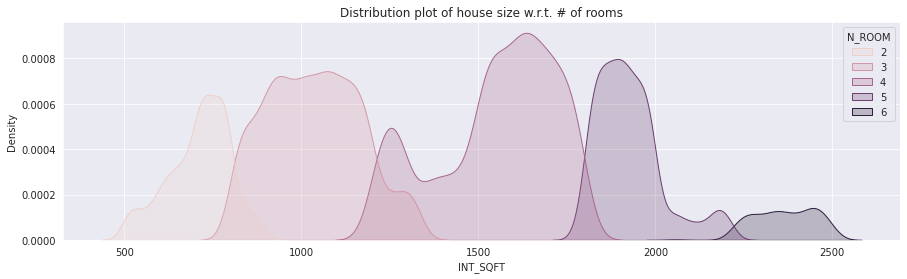

In [41]:
plt.figure(figsize=(15,4))
sns.kdeplot('INT_SQFT', hue='N_BEDROOM', data=data, shade=True )
plt.title("Distribution plot of house size w.r.t. # of bedrooms")
plt.show()

# Houses with single bedroom are of size 500 sq ft to 2000 sq ft. where as most houses lie in 500 - 1500 sq ft range.
# Houses with double bedroom ranges from 1100 sq ft to 2300 sq ft range, whereas, triple bedroom houses are of only 1700 sq ft to 2100 sq ft.

# Houses with 4 bedrooms are of size 2100 sqft to 2500 sq ft.

plt.figure(figsize=(15,4))
sns.kdeplot('INT_SQFT', hue='N_ROOM', data=data, shade=True )
plt.title("Distribution plot of house size w.r.t. # of rooms")
plt.show()

# From the above plot we can see that,

# Very few houses has 6 rooms and 2 rooms.
# Most houses are having 4 rooms followed by 3 rooms.

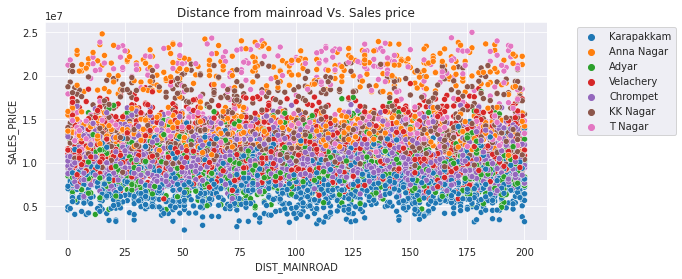

In [42]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='DIST_MAINROAD',y='SALES_PRICE', data=data, hue='AREA')
plt.title("Distance from mainroad Vs. Sales price")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()
#Uniform distribution, can drop this feature.


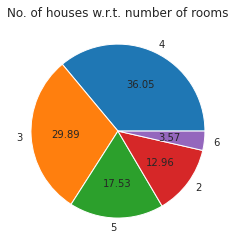

In [43]:
data.N_ROOM.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("No. of houses w.r.t. number of rooms")
plt.ylabel('')
plt.show()

   N_ROOM   SALES_PRICE
0       2  7.311581e+06
1       3  9.705458e+06
2       4  1.225463e+07
3       5  1.483657e+07
4       6  1.527924e+07


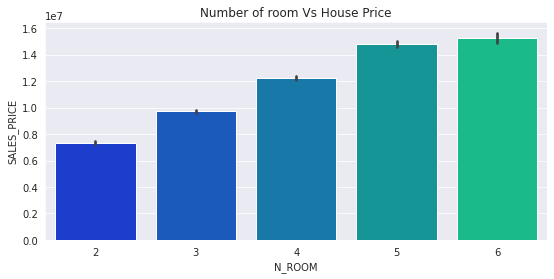

In [44]:
order = data[['N_ROOM','SALES_PRICE']].groupby('N_ROOM').mean().sort_values('SALES_PRICE').reset_index()
print(order)

plt.figure(figsize=(9,4))
sns.barplot(data=data, x='N_ROOM',y='SALES_PRICE', order=order.N_ROOM, palette='winter')
plt.title("Number of room Vs House Price")
plt.show()
# With increase in room number, house price increase. Follows a linear trend.
# The above pie plot evident that people are interested in house with 4 number of rooms followed by 3 rooms.

# Anna Nagar, Velachery, KK Nagar, and T Nagar has houses more with more than 4 rooms.

# KK Nagar is the only place to have houses with 6 rooms.

# Chrompet has highest number of houses sold with 3 room

1    3796
2    2352
3     707
4     254
Name: N_BEDROOM, dtype: int64


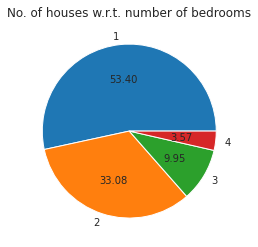

In [45]:
print(data.N_BEDROOM.value_counts())
data.N_BEDROOM.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("No. of houses w.r.t. number of bedrooms")
plt.ylabel('')
plt.show()

#3796 (53.4%) houses in the dataset has single bedroom. Whereas, only 254 (3.57%) houses has 4 bedrooms.

   N_BEDROOM   SALES_PRICE
0          1  1.022734e+07
1          2  1.239016e+07
2          3  1.313775e+07
3          4  1.527924e+07


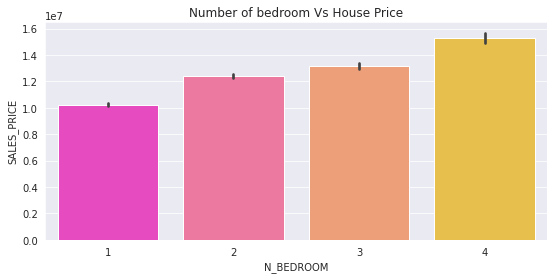

In [46]:
order = data[['N_BEDROOM','SALES_PRICE']].groupby('N_BEDROOM').mean().sort_values('SALES_PRICE').reset_index()


print(order)

plt.figure(figsize=(9,4))
sns.barplot(data=data, x='N_BEDROOM',y='SALES_PRICE', order=order.N_BEDROOM, palette='spring')
plt.title("Number of bedroom Vs House Price")
plt.show()
#Number of bedrooms and house price follows a linear trend.


In [47]:
locality_wise_bedroom= data.groupby(['AREA', 'N_ROOM', 'N_BEDROOM'])['N_BEDROOM'].count().to_frame(name='count')
locality_wise_bedroom


count
AREA       N_ROOM N_BEDROOM       
Adyar      2      1            213
           3      1            429
           4      2            132
Anna Nagar 4      1            474
           5      2            314
Chrompet   2      1            276
           3      1           1145
           4      2            281
KK Nagar   3      1             39
           4      2            364
           5      3            340
           6      4            254
Karapakkam 2      1            432
           3      1            512
           4      2            422
T Nagar    4      1            276
           5      2            225
Velachery  4      2            614
           5      3            367

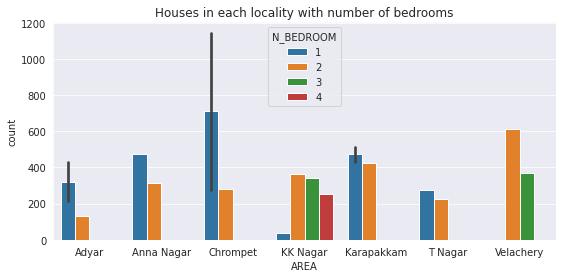

In [48]:
plt.figure(figsize=(9,4))
sns.barplot(data=locality_wise_bedroom.reset_index(), x='AREA', y='count', hue='N_BEDROOM')
plt.title("Houses in each locality with number of bedrooms")
plt.show()
#Chrompet has highest number of houses with 3 rooms, but most of them are single bedroom.


1    5594
2    1515
Name: N_BATHROOM, dtype: int64


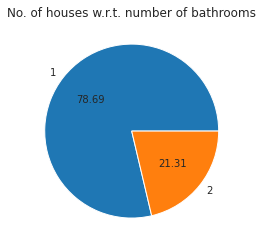

In [49]:
print(data.N_BATHROOM.value_counts())
data.N_BATHROOM.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("No. of houses w.r.t. number of bathrooms")
plt.ylabel('')
plt.show()
#More houses have single bathroom.


In [50]:
locality_wise_bathroom= data.groupby(['AREA', 'N_ROOM', 'N_BATHROOM'])['N_BATHROOM'].count().to_frame(name='count')
locality_wise_bathroom


count
AREA       N_ROOM N_BATHROOM       
Adyar      2      1             213
           3      1             429
           4      2             132
Anna Nagar 4      1             474
           5      1             314
Chrompet   2      1             276
           3      1            1145
           4      1             281
KK Nagar   3      1              39
           4      1             364
           5      2             340
           6      2             254
Karapakkam 2      1             432
           3      1             512
           4      2             422
T Nagar    4      1             276
           5      1             225
Velachery  4      1             614
           5      2             367

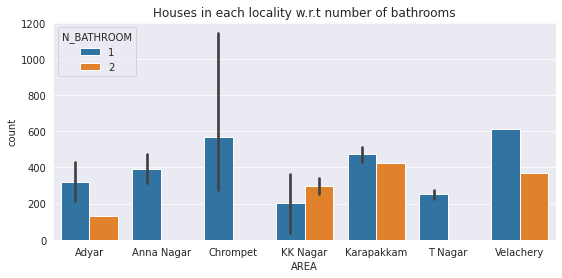

In [51]:
plt.figure(figsize=(9,4))
sns.barplot(data=locality_wise_bathroom.reset_index(), x='AREA', y='count', hue='N_BATHROOM')
plt.title("Houses in each locality w.r.t number of bathrooms")
plt.show()

# Anna Nagar, Chrompet and T Nagar has no houses with double bathrooms.

# KK Nagar has more number of houses with double bathrooms.



AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: SALE_COND, dtype: int64


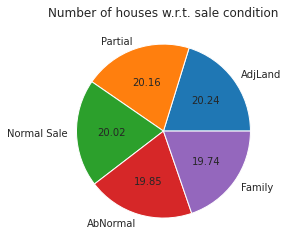

In [52]:
print(data.SALE_COND.value_counts())
data.SALE_COND.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.ylabel('')
plt.title("Number of houses w.r.t. sale condition")
plt.show()
#The different types of sale conditions are not much significant, however, sale condition as AdjLand has highest number of houses, and family type sales are less.


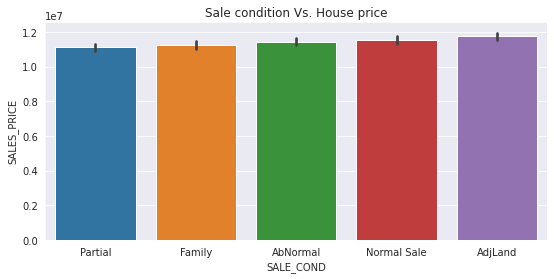

In [53]:
plt.figure(figsize=(9,4))
sns.barplot(x='SALE_COND', y='SALES_PRICE', data=data, order=data[['SALE_COND','SALES_PRICE']].groupby('SALE_COND').mean().sort_values('SALES_PRICE').reset_index().SALE_COND)
plt.title("Sale condition Vs. House price")
plt.show()

# Sale condition of house with respect to house price follows a linear trend.

# Adjacent lands are of highest price, where as partially sold houses has less price.



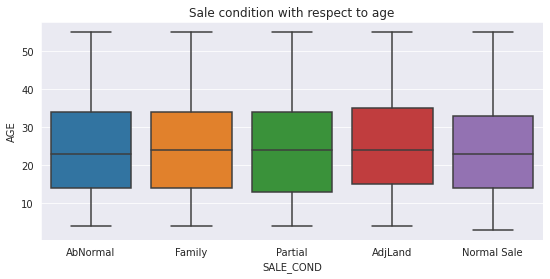

In [54]:
# Is there any relation between sale condition and age
plt.figure(figsize=(9,4))
sns.boxplot(x='SALE_COND', y='AGE', data=data)
plt.title("Sale condition with respect to age")
plt.show()

#Sale condition w.r.t. house age is not much different from each other. Equally linearly distributed.


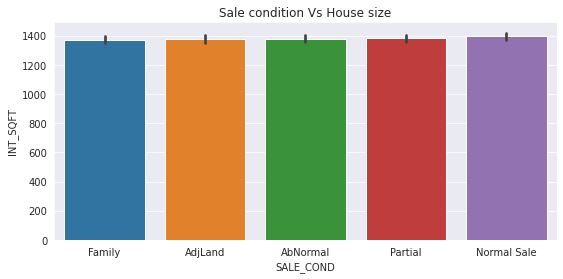

In [55]:
plt.figure(figsize=(9,4))
sns.barplot(x='SALE_COND', y='INT_SQFT', data=data, order=data[['SALE_COND','INT_SQFT']].groupby('SALE_COND').mean().sort_values('INT_SQFT').reset_index().SALE_COND)
plt.title("Sale condition Vs House size")
plt.show()
#Sale condition with respect to house size follows a linear trend. Where Normal sale type has higher distribution and family type is lower.



Yes    3587
No     3522
Name: PARK_FACIL, dtype: int64


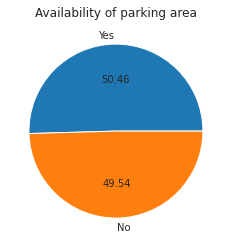

In [56]:
print(data.PARK_FACIL.value_counts())

data.PARK_FACIL.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("Availability of parking area")
plt.ylabel('')
plt.show()

#Only 0.92% more houses has parking facility.


House         2444
Others        2336
Commercial    2329
Name: BUILDTYPE, dtype: int64


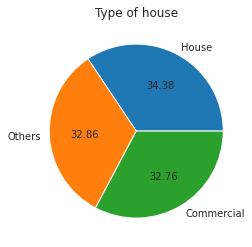

In [57]:
#Built Type
print(data.BUILDTYPE.value_counts())
plt.figure(figsize=(9,4))
data.BUILDTYPE.value_counts().plot(kind='pie', autopct='%.2f')
plt.title("Type of house")
plt.ylabel('')
plt.show()
#More number of houses are of house type building where as less number of houses are commercial build.


             SALES_PRICE
BUILDTYPE               
House       9.531205e+06
Others      1.027346e+07
Commercial  1.453023e+07


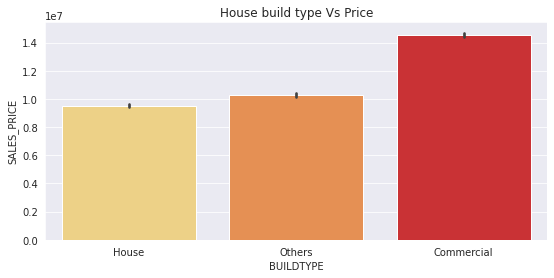

In [58]:
print(data[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE'))

plt.figure(figsize=(9,4))
sns.barplot(x='BUILDTYPE', y='SALES_PRICE', data=data, order=data[['BUILDTYPE','SALES_PRICE']].groupby('BUILDTYPE').mean().sort_values('SALES_PRICE').reset_index().BUILDTYPE, palette='YlOrRd')
plt.title("House build type Vs Price")
plt.show()
# Commercial houses are expensive than house type buildings.

# Does not follow linear trend. (one-hot encoding)

In [59]:
#Utility Available
print("Number of utility {}\nE.g.:".format(data.UTILITY_AVAIL.nunique()))
print(*data.UTILITY_AVAIL.unique().tolist())

Number of utility 4
E.g.:
AllPub ELO NoSewr  NoSeWa


AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: UTILITY_AVAIL, dtype: int64


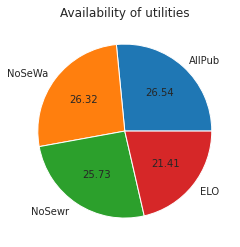

In [60]:
print(data.UTILITY_AVAIL.value_counts())
plt.figure(figsize=(9,4))
data.UTILITY_AVAIL.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("Availability of utilities")
plt.ylabel('')
plt.show()
#26.54% houses has all public facilities available.


                SALES_PRICE
UTILITY_AVAIL              
ELO            1.094887e+07
NoSeWa         1.141877e+07
NoSewr         1.144859e+07
AllPub         1.174658e+07


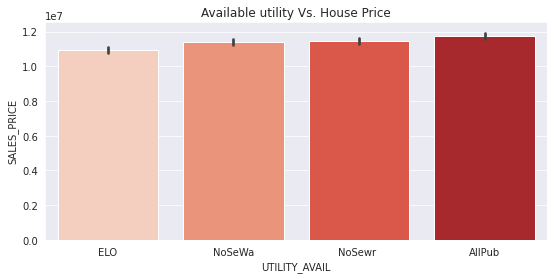

In [61]:
order = data[['UTILITY_AVAIL','SALES_PRICE']].groupby('UTILITY_AVAIL').mean().sort_values('SALES_PRICE')
print(order)
plt.figure(figsize=(9,4))
sns.barplot(x='UTILITY_AVAIL', y='SALES_PRICE', data=data, order=order.reset_index().UTILITY_AVAIL, palette='Reds')
plt.title("Available utility Vs. House Price")
plt.show()
#Utility available follows a linear trend with respect to sales price.


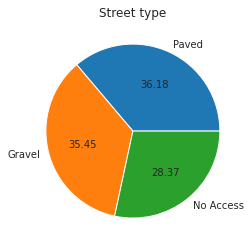

In [62]:
data.STREET.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("Street type")
plt.ylabel('')
plt.show()
#More than 36% houses has paved street, and 28.37% houses are not connected to any major root.


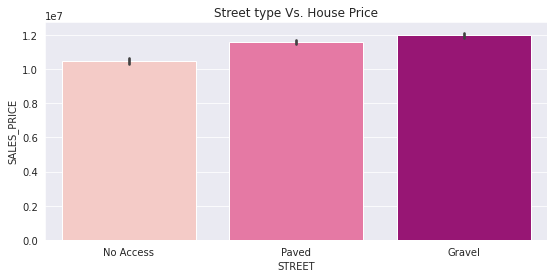

In [63]:
order = data[['STREET','SALES_PRICE']].groupby('STREET').mean().sort_values('SALES_PRICE')
plt.figure(figsize=(9,4))
sns.barplot(x='STREET', y='SALES_PRICE', data=data, order=order.reset_index().STREET, palette='RdPu')
plt.title("Street type Vs. House Price")
plt.show()

# Street type follows a linear trend with house price.
# Gravel houses have highest price.
# Will go with one hot coding.


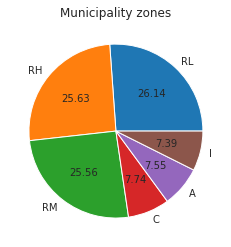

In [64]:
data.MZZONE.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("Municipality zones")
plt.ylabel('')
plt.show()

# There are houses from 6 municipality zone are present in the dataset.
# Most number of houses are from RL, RH and RM zone.
order = data[['MZZONE', 'SALES_PRICE']].groupby('MZZONE').mean().sort_values('SALES_PRICE')



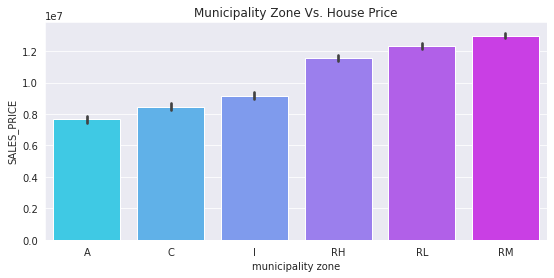

In [65]:
plt.figure(figsize=(9,4))
sns.barplot(x='MZZONE', y='SALES_PRICE', data=data, order=order.reset_index().MZZONE, palette='cool')
plt.title("Municipality Zone Vs. House Price")
plt.xlabel('municipality zone')
plt.show()

# House price increases with the municipality zone.

# RM zone has most expensive houses, whereas A zone has cheapest houses.



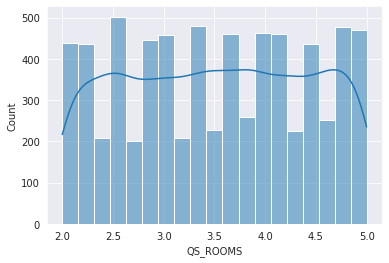

In [66]:
#QSROOMS
sns.histplot(data=data, x='QS_ROOMS', kde=True);
#Distribution in QS rooms is uniform.


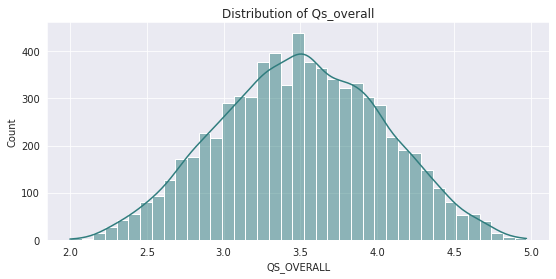

In [67]:
plt.figure(figsize=(9,4))
sns.histplot(data=data, x='QS_OVERALL', color='#307d7e', kde=True)
plt.title("Distribution of Qs_overall")
plt.show()

#QS overall follows a linear distribution


data preprocessing

In [68]:
df = data.copy()

df.head()
def mapper_func(col):
    mapper = {}
    for i in col:
        print(i)
        val = int(input())
        mapper[i] = val
    
    return mapper
locality_mapper = mapper_func(col=df.AREA.unique().tolist())
print(locality_mapper)
{'Karapakkam': 1, 'Anna Nagar': 6, 'Adyar': 2, 'Velachery': 4, 'Chrompet': 3, 'KK Nagar': 5, 'T Nagar': 7}
7

Karapakkam
1
Anna Nagar
6
Adyar
2
Velachery
4
Chrompet
3
KK Nagar
5
T Nagar
7
{'Karapakkam': 1, 'Anna Nagar': 6, 'Adyar': 2, 'Velachery': 4, 'Chrompet': 3, 'KK Nagar': 5, 'T Nagar': 7}


{'Adyar': 2,
 'Anna Nagar': 6,
 'Chrompet': 3,
 'KK Nagar': 5,
 'Karapakkam': 1,
 'T Nagar': 7,
 'Velachery': 4}

In [69]:
sale_condition_mapper = mapper_func(df.SALE_COND.unique().tolist())

print(sale_condition_mapper)
{'AbNormal': 3, 'Family': 2, 'Partial': 1, 'AdjLand': 5, 'Normal Sale': 4}


AbNormal
3
Family
2
Partial
1
AdjLand
5
Normal Sale
4
{'AbNormal': 3, 'Family': 2, 'Partial': 1, 'AdjLand': 5, 'Normal Sale': 4}


{'AbNormal': 3, 'AdjLand': 5, 'Family': 2, 'Normal Sale': 4, 'Partial': 1}

In [70]:
utility_mapper = mapper_func(df.UTILITY_AVAIL.unique().tolist())

print(utility_mapper)

{'AllPub': 4, 'ELO': 1, 'NoSewr ': 3, 'NoSeWa': 2}


AllPub
4
ELO
1
NoSewr 
3
NoSeWa
2
{'AllPub': 4, 'ELO': 1, 'NoSewr ': 3, 'NoSeWa': 2}


{'AllPub': 4, 'ELO': 1, 'NoSeWa': 2, 'NoSewr ': 3}

In [71]:
df.MZZONE.unique().tolist()

mzone_mapper = mapper_func(df.MZZONE.unique().tolist())

print(mzone_mapper)

{'A': 1, 'RH': 4, 'RL': 5, 'I': 3, 'C': 2, 'RM': 6}
street_mapper = mapper_func(df.STREET.unique().tolist())
print(street_mapper)
{'Paved': 2, 'Gravel': 3, 'No Access': 1}

A
1
RH
4
RL
5
I
3
C
2
RM
6
{'A': 1, 'RH': 4, 'RL': 5, 'I': 3, 'C': 2, 'RM': 6}
Paved
2
Gravel
3
No Access
1
{'Paved': 2, 'Gravel': 3, 'No Access': 1}


{'Gravel': 3, 'No Access': 1, 'Paved': 2}

In [72]:
#Label Encoding
df['AREA'] = df.AREA.map(locality_mapper)           # map locality
df['SALE_COND'] = df.SALE_COND.map(sale_condition_mapper)   # map sale condition
df['PARK_FACIL'] = df.PARK_FACIL.map({'Yes':1,"No":0})      # parking facility
# df['buildtype'] = df.buildtype.map(build_type_mapper)       # build type
df['UTILITY_AVAIL'] = df.UTILITY_AVAIL.map(utility_mapper)  # utility
df['STREET'] = df.STREET.map(street_mapper)                 # street
df['MZZONE'] = df.MZZONE.map(mzone_mapper)                  # municipality zone
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE
0,1,1004,131,1,1,3,3,1,Commercial,4,2,1,4.0,3.9,4.9,4.330,8124400,44
1,6,1986,26,2,1,5,3,0,Commercial,4,3,4,4.9,4.2,2.5,3.765,22781941,11
2,2,909,70,1,1,3,3,1,Commercial,1,3,5,4.1,3.8,2.2,3.090,13672408,20
3,4,1855,14,3,2,5,2,0,Others,3,2,3,4.7,3.9,3.6,4.010,10063653,22
4,1,1226,84,1,1,3,3,1,Others,4,3,2,3.0,2.5,4.1,3.290,7717313,30


In [73]:
# Encoding build type

df = pd.get_dummies(df)
df.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,131,1,1,3,3,1,4,2,1,4.0,3.9,4.9,4.330,8124400,44,1,0,0
1,6,1986,26,2,1,5,3,0,4,3,4,4.9,4.2,2.5,3.765,22781941,11,1,0,0
2,2,909,70,1,1,3,3,1,1,3,5,4.1,3.8,2.2,3.090,13672408,20,1,0,0
3,4,1855,14,3,2,5,2,0,3,2,3,4.7,3.9,3.6,4.010,10063653,22,0,0,1
4,1,1226,84,1,1,3,3,1,4,3,2,3.0,2.5,4.1,3.290,7717313,30,0,0,1


In [74]:
# drop columns with no relation to house price
# dist_mainroad, qs_rooms, qs_bedroom, qs_overall

df.columns

Index(['AREA', 'INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM',
       'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'UTILITY_AVAIL', 'STREET',
       'MZZONE', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL',
       'SALES_PRICE', 'AGE', 'BUILDTYPE_Commercial', 'BUILDTYPE_House',
       'BUILDTYPE_Others'],
      dtype='object')

In [75]:
df.drop(['DIST_MAINROAD', 'QS_ROOMS', 'QS_BATHROOM','QS_OVERALL', 'QS_BEDROOM'], axis=1, inplace=True)
df.to_csv('chennai-housing-label-encoded.csv', index=False)
#Split the dataset
df = pd.read_csv('chennai-housing-label-encoded.csv')
df.head()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,AGE,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,1,1004,1,1,3,3,1,4,2,1,8124400,44,1,0,0
1,6,1986,2,1,5,3,0,4,3,4,22781941,11,1,0,0
2,2,909,1,1,3,3,1,1,3,5,13672408,20,1,0,0
3,4,1855,3,2,5,2,0,3,2,3,10063653,22,0,0,1
4,1,1226,1,1,3,3,1,4,3,2,7717313,30,0,0,1


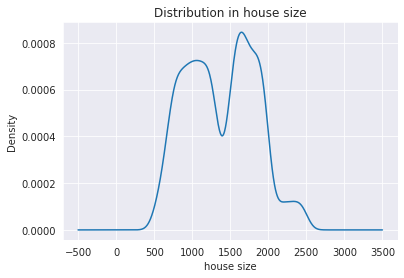

In [76]:
#Transform of non-linear data
df.INT_SQFT.plot.kde()
plt.title("Distribution in house size")
plt.xlabel('house size')
plt.show()

#Non-normal distribution.


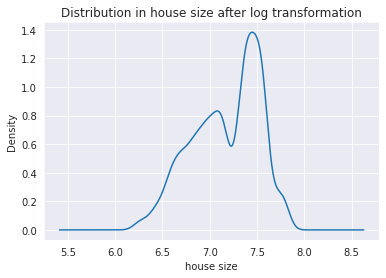

In [77]:
# Transformation
df['INT_SQFT'] = np.log(df.INT_SQFT)
df.INT_SQFT.plot(kind='kde')
plt.title("Distribution in house size after log transformation")
plt.xlabel('house size')
plt.show()


In [80]:
#Train test split
X = df.drop(['SALES_PRICE'], axis=1)
y = df.SALES_PRICE

X.shape, y.shape

((7109, 14), (7109,))

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, random_state=47, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5687, 14), (5687,), (1422, 14), (1422,))

In [82]:
#Scale
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#Fit Linear Regression Model
lr = LinearRegression().fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)
# score
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))


print("")
print("R2 score: {:.2f}".format(metrics.r2_score(y_test, y_pred)))
print("MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))

Training score: 0.92
Test score: 0.92

R2 score: 0.92
MSE: 1192059100844.86
MAE: 823438.55


In [83]:
#prediction
lr_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

lr_prediction.head(10)


,actual,predicted
3410,9305778,9.574090e+06
5610,11420800,1.089556e+07
72,9466999,9.931466e+06
4268,13685704,1.477550e+07
2399,21694013,1.912750e+07
661,12937737,1.332295e+07
3798,8652769,7.810250e+06
708,6550648,5.457098e+06
3464,21137174,1.934356e+07
2126,11998838,1.312379e+07


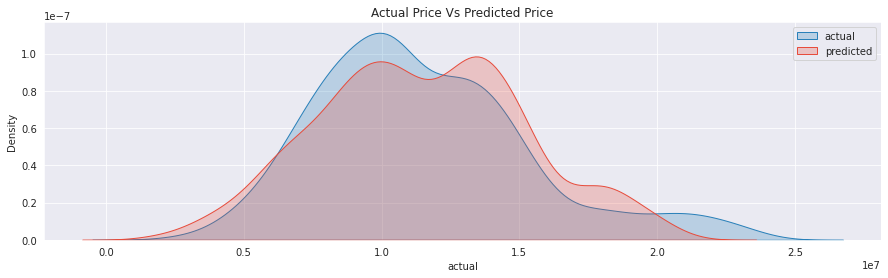

In [84]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=lr_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=lr_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

# Model has 92% r2 score, the train and test score are also same.
# However, most of predictions are not good.


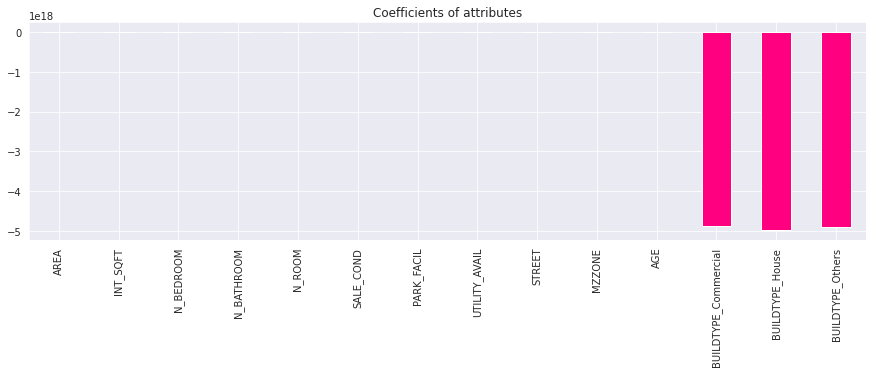

In [85]:
# coefficients
lr_coefficient = pd.Series(lr.coef_, index=X.columns.tolist())

plt.figure(figsize=(15, 4))
lr_coefficient.plot(kind='bar', color=['#ff0080'])
plt.title("Coefficients of attributes")
plt.show()

# Features like distance form main road, number of bedrooms, utility available, qs room, qs bedroom, qs overall and age has less coefficient.

# Build type, number of bedroom, number of room, locality, and municipality zone are having higher coefficient.



In [86]:
#ElasticNet Regression
elnet= ElasticNet(alpha=0.001, l1_ratio=0.62)

elnet.fit(X_train, y_train)
elasticnet_predict = elnet.predict(X_test)
# score
print("ElasticNet Training score: {:.2f}".format(elnet.score(X_train, y_train)))
print("ElasticNet Test score: {:.2f}".format(elnet.score(X_test, y_test)))


print("")
print("ElasticNet R2 score: {:.2f}".format(metrics.r2_score(y_test, elasticnet_predict)))
print("ElasticNet MSE: {:.2f}".format(metrics.mean_squared_error(y_test, elasticnet_predict)))
print("ElasticNet MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, elasticnet_predict)))


ElasticNet Training score: 0.92
ElasticNet Test score: 0.92

ElasticNet R2 score: 0.92
ElasticNet MSE: 1192503440184.48
ElasticNet MAE: 823328.41


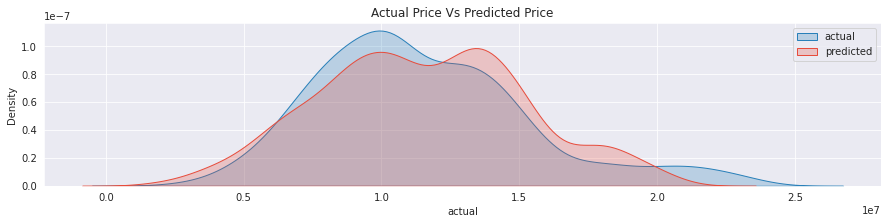

In [87]:
elnet_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':elasticnet_predict.flatten()
})


plt.figure(figsize=(15,3))
sns.kdeplot(data=elnet_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=elnet_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()
#Both the elastic net and linear regression predictions are identical.


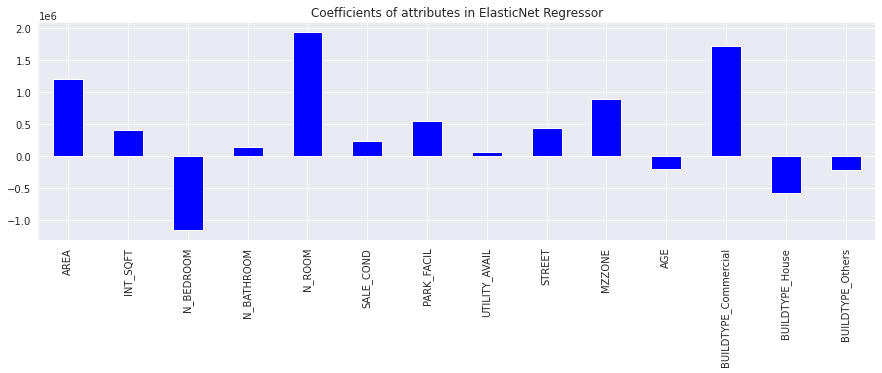

In [88]:
# coefficients
elnet_coefficient = pd.Series(elnet.coef_, index=X.columns.tolist())

plt.figure(figsize=(15, 4))
elnet_coefficient.plot(kind='bar', color=['b'])
plt.title("Coefficients of attributes in ElasticNet Regressor")
plt.show()
#The coefficients of elastic net regressor model are also same to the coefficients of elastic net regressor.


In [89]:
#Decision Tree Regression:
dt_regressor = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)

dt_y_predict = dt_regressor.predict(X_test)
# score
print("DT Training score: {:.2f}".format(dt_regressor.score(X_train, y_train)))
print("DT Test score: {:.2f}".format(dt_regressor.score(X_test, y_test)))


print("")
print("DT R2 score: {:.2f}".format(metrics.r2_score(y_test, dt_y_predict)))
print("DT MSE: {:.2f}".format(metrics.mean_squared_error(y_test, dt_y_predict)))
print("DT MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, dt_y_predict)))
# The R^2 score looks good.
# The train test scores are near to each other.


DT Training score: 0.97
DT Test score: 0.96

DT R2 score: 0.96
DT MSE: 661973365117.28
DT MAE: 641754.99


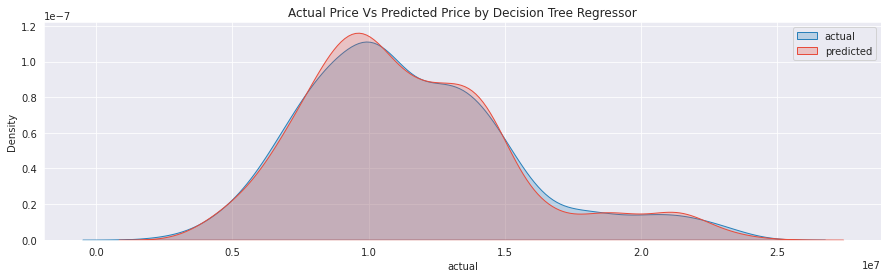

In [90]:
dt_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': dt_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=dt_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=dt_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by Decision Tree Regressor")
plt.legend()
plt.show()

# The predictions of DT looks nearly accurate and the model has better score


In [91]:
# coefficients
dt_coefficient = pd.Series(dt_regressor.feature_importances_, index=X.columns.tolist())
dt_coefficient.sort_values(ascending=False)


AREA                    0.495919
BUILDTYPE_Commercial    0.331385
INT_SQFT                0.110046
MZZONE                  0.036050
PARK_FACIL              0.014238
STREET                  0.007358
BUILDTYPE_Others        0.002234
BUILDTYPE_House         0.001339
AGE                     0.001137
SALE_COND               0.000149
UTILITY_AVAIL           0.000139
N_ROOM                  0.000006
N_BEDROOM               0.000000
N_BATHROOM              0.000000
dtype: float64

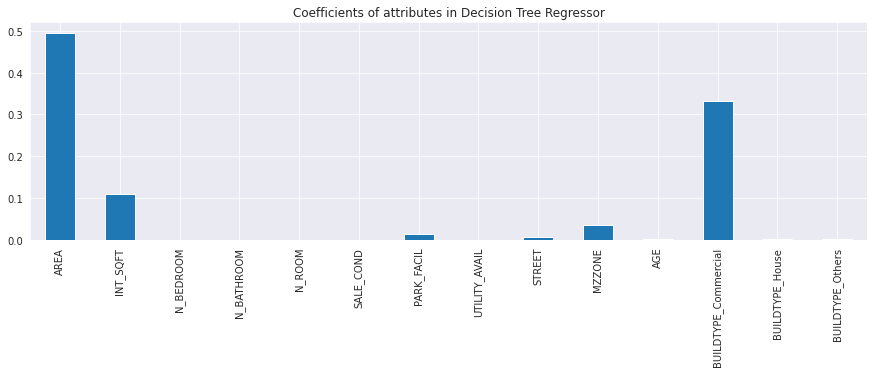

In [93]:
# coefficients

plt.figure(figsize=(15, 4))
dt_coefficient.plot(kind='bar')
plt.title("Coefficients of attributes in Decision Tree Regressor")
plt.show()
#In the decision tree regressor model, locality, building type has more feature importance, followed by house size and municipality zone.

#Parking facility, street type and number of bedrooms have little importance.

In [94]:
#KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

knn_ypred = knn_regressor.predict(X_test)


print("KNN regressor train score: {:.2f}".format(knn_regressor.score(X_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn_regressor.score(X_test, y_test)))


KNN regressor train score: 0.97
KNN regressor test score: 0.95


In [95]:
# Cross validation of knn

knn_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=dict(n_neighbors=[2,5,10,15,20,24,25,28,30,]), cv=3)

knn_search.fit(X,y)

print("Best parameter:", knn_search.best_params_)
print("Best score: ",knn_search.best_score_)


Best parameter: {'n_neighbors': 5}
Best score:  0.7657282906865849
